### Implementing the Vector Class

A vector is as array, except that it can "grow" to accommodate as many items as you actually try to put into it:

### 1. Required Performance

<pre>
The C++ standard specifies that a legal (i.e., standard-conforming) implementation of vector must satisfy the following performance requirements:

Operation	Speed
vector()	    O(1)
vector(n, x)	O(n)
size()   	    O(1)
v[ i ]	        O(1)
push_back(x)	O(1)
pop_back	    O(1)
insert	        O(size())
erase	        O(size())
front, back	    O(1)
</pre>

### 2. Implementing a vector class

We want to support operator[] in O(1) time.
Natural choice is to use an array. But how to allow vectors to grow to arbitrary size?

### 2.1. Focus on push_back

<pre>
template &lt;class T&gt; class miniVector {
private:
    int vCapacity; // amount of available space how large the array is
    int vSize;     // number of elements in the list how many elts are in the array
    T *vArr;       // the dynamic array
  
    T& miniVector<T>::operator [] (unsigned int i){ 
        assert ((i >= 0) && (index < vSize));
        return vArr[i]; 
    }
    
    // insure that list has sufficient capa, add the new item to the list, and increment vSize
    template &lt;typename T&gt;
    void miniVector<T>::push_back(const T& item){  // add item to the list, update vSize
    // if space is full, allocate more capacity
        if (vSize == vCapacity){
            if (vCapacity == 0)
                // if capacity is 0, set capacity to 1.
                // set copy to false because there are no existing elements
                reserve(1,false);
            else  // double the capacity
                reserve(2 * vCapacity, true);
        }
        // add item to the list, update vSize
        vArr[vSize] = item;
        vSize++;
    }
};
</pre>

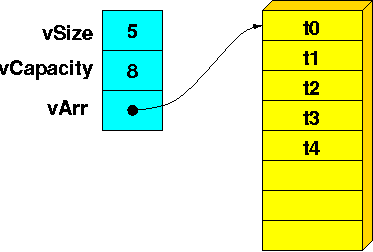

The basic data structure we use for vectors is a pointer to a dynamically allocated array

### 2.2. Adding to an Array That Has Unused Space

operation of adding a new element to the end of this vector (push_back). : v.push_back(t5);
If there is room in the array, we just add our new data element.

### 2.3. Adding to an Array That is Full

If array is already filled to capacity, and we try to add more to it, : v.push_back(T4); 
we make another that is twice as big

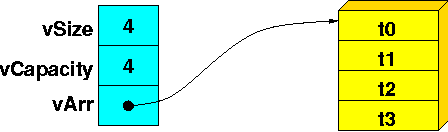

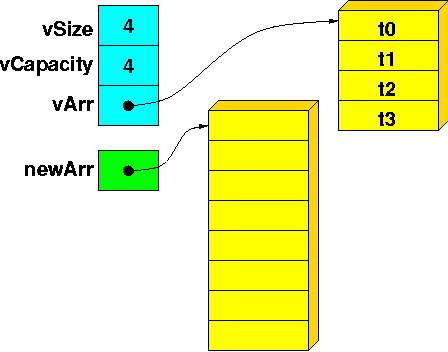

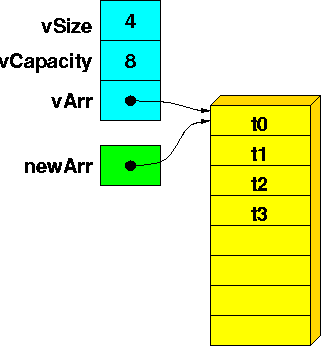

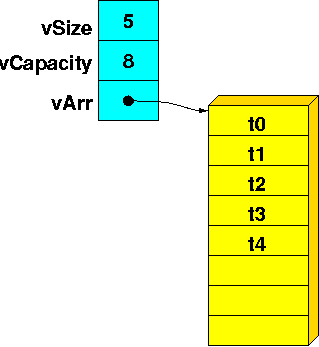

First the new data area is allocated.
Then the old data is copied into the new array.
The old array is deleted, and the vArr and vCapacity fields updated.
Now we can add the new element to the end of the vector.
We'll see later what this does to O(f(N)) for push_back().

2.4. Expanding the Array
2.5. Copying the Data into the Explanded Array
2.6. Discarding the Old Array
2.7. Adding to an Array That Has Unused Space (Reprise)


### 3. Coding push_back

If the data array is already filled to capacity, and we try to add more to it, we make another that is twice as big…
First the new data area is allocated.
Then the old data is copied into the new array.
The old array is deleted, and the vArr and vCapacity fields updated.
Now we can add the new element to the end of the vector.

### 3.1. Are we Full?

### 3.2. If Full, Reserve More Space

### Reserve: allocate a new array

<pre>
template <typename T>
void miniVector<T>::reserve(int n, bool copy){  //Total O(Size())
  T *newArr;
  int i;
  
  // allocate a new dynamic array with n elements  O(1)
  newArr = new T[n];
  if (newArr == NULL) throw memoryAllocationError("miniVec reserve(): mem alloc failure");
  
  // if copy is true, copy elements from the old list to the new list O(size())
  if (copy) for(i = 0; i < vSize; i++) newArr[i] = vArr[i];
  
  // delete original dynamic array. if vArr is NULL, the vector was
  // originally empty and there is no memory to delete  O(1)
  if (vArr != NULL) delete [] vArr;
  
  // set vArr to the value newArr. update vCapacity O(1)
  vArr = newArr;
  vCapacity = n;
}
</pre>